## Reading values for G0 'Werktag' and making dataframes for load p_mw and q_mvar

In [12]:
import numpy as np
import math
import pandapower.plotting as pplt
import matplotlib.pyplot as plt
import pandapower as pp
import pandas as pd
import pandapower.networks as nw
import pandapower.plotting as plot
from pandapower.control.controller.const_control import ConstControl
from pandapower.timeseries.data_sources.frame_data import DFData
from pandapower.timeseries.run_time_series import run_timeseries
from pandapower.timeseries.output_writer import OutputWriter
net_mv = nw.create_cigre_network_mv(with_der=False)
net_lv = nw.create_cigre_network_lv()

# IMPORTING DATA OF TABLE1 FROM EXCEL FILE

In [13]:
df = pd.read_excel("MV_DER.xlsx", index_col=0, sheet_name="MV")

for idx in df.index:
    pp.create_sgen(net_mv, bus=df.at[idx, "bus"], p_mw=df.at[idx,"p_mw"], q_mvar=df.at[idx, "q_mvar"], sn_mva=df.at[idx,"sn_mva"], name=df.at[idx,"name"], type=df.at[idx,"type"])

print(net_mv.sgen)

    name  bus   p_mw  q_mvar  sn_mva  scaling  in_service type  current_source
0    PV1    1  10.00     0.0   10.00      1.0        True   PV            True
1   WKA1    1  12.00     0.0   12.00      1.0        True   WP            True
2    PV3    3   0.15     0.0    0.15      1.0        True   PV            True
3    PV4    4   0.30     0.0    0.30      1.0        True   PV            True
4    PV8    8   0.15     0.0    0.15      1.0        True   PV            True
5    PV9    9   0.45     0.0    0.45      1.0        True   PV            True
6   PV11   11   0.30     0.0    0.30      1.0        True   PV            True
7   WKA7    7   3.00     0.0    3.00      1.0        True   WP            True
8   PV12   12  15.00     0.0   15.00      1.0        True   PV            True
9  WKA12   12  12.00     0.0   12.00      1.0        True   WP            True


# IMORTING DATA FROM EXCEL FILE OF TABLE2

In [14]:
df_lv = pd.read_excel("MV_DER.xlsx", index_col=0, sheet_name="LV")

for idx in df_lv.index:
    pp.create_sgen(net_lv, bus=df_lv.at[idx, "bus"], p_mw=df_lv.at[idx,"p_mw"], q_mvar=df_lv.at[idx, "q_mvar"], sn_mva=df_lv.at[idx,"sn_mva"], name=df_lv.at[idx,"name"], type=df_lv.at[idx,"type"])

print(net_lv.sgen)

     name  bus  p_mw  q_mvar  sn_mva  scaling  in_service type  current_source
0   PV R1    2  0.10     0.0    0.10      1.0        True   PV            True
1  PV R11   12  0.03     0.0    0.03      1.0        True   PV            True
2  PV R15   16  0.03     0.0    0.03      1.0        True   PV            True
3  PV R16   17  0.03     0.0    0.03      1.0        True   PV            True
4  PV R17   18  0.05     0.0    0.05      1.0        True   PV            True
5  PV R18   19  0.05     0.0    0.05      1.0        True   PV            True


USING DROP COMMAND TO REMOVE BUSES FROM LV NETWORKS

       name  vn_kv type      zone  in_service
0     Bus 0   20.0    b  CIGRE_LV        True
1    Bus R0   20.0    b  CIGRE_LV        True
2    Bus R1    0.4    b  CIGRE_LV        True
3    Bus R2    0.4    m  CIGRE_LV        True
4    Bus R3    0.4    m  CIGRE_LV        True
5    Bus R4    0.4    m  CIGRE_LV        True
6    Bus R5    0.4    m  CIGRE_LV        True
7    Bus R6    0.4    m  CIGRE_LV        True
8    Bus R7    0.4    m  CIGRE_LV        True
9    Bus R8    0.4    m  CIGRE_LV        True
10   Bus R9    0.4    m  CIGRE_LV        True
11  Bus R10    0.4    m  CIGRE_LV        True
12  Bus R11    0.4    m  CIGRE_LV        True
13  Bus R12    0.4    m  CIGRE_LV        True
14  Bus R13    0.4    m  CIGRE_LV        True
15  Bus R14    0.4    m  CIGRE_LV        True
16  Bus R15    0.4    m  CIGRE_LV        True
17  Bus R16    0.4    m  CIGRE_LV        True
18  Bus R17    0.4    m  CIGRE_LV        True
19  Bus R18    0.4    m  CIGRE_LV        True


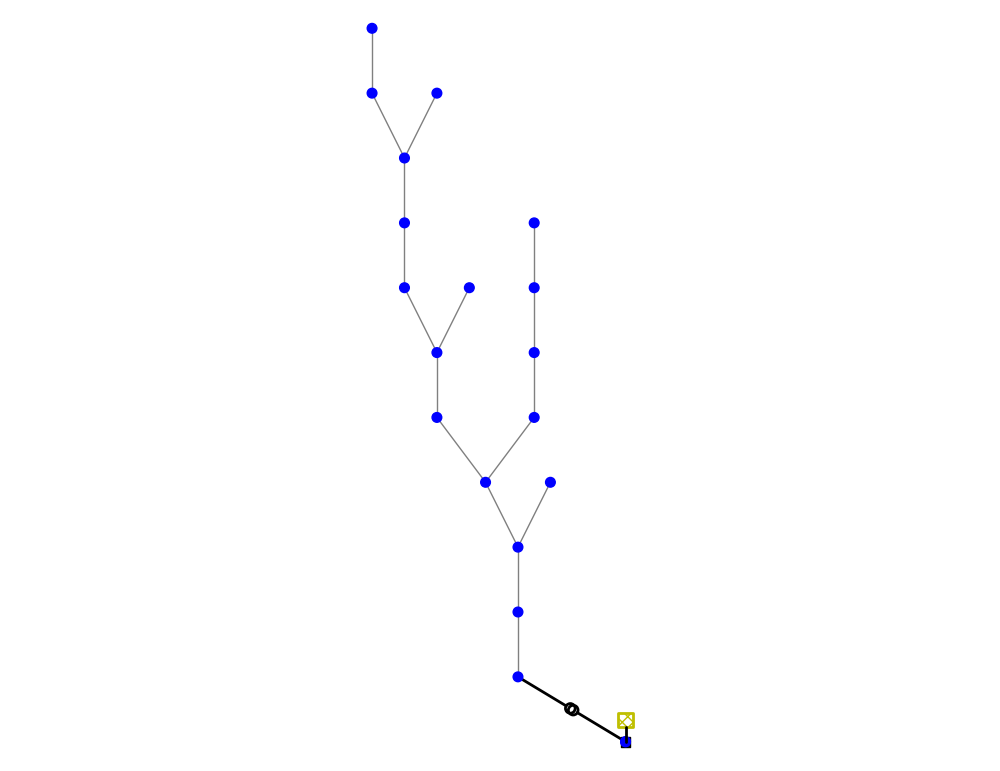

This pandapower network includes the following parameter tables:
   - bus (20 elements)
   - load (6 elements)
   - sgen (6 elements)
   - switch (1 element)
   - ext_grid (1 element)
   - line (17 elements)
   - trafo (1 element)
   - bus_geodata (20 elements)
 and the following results tables:
   - res_bus (20 elements)
   - res_line (17 elements)
   - res_trafo (1 element)
   - res_ext_grid (1 element)
   - res_load (6 elements)
   - res_sgen (6 elements)
   - res_switch (1 element)


In [15]:
#net_lv.bus.drop(index=[20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43],inplace=True)
#pp.runpp(net_lv)

pp.drop_buses(net_lv, net_lv.bus.index[20:44], drop_elements=True)
pp.runpp(net_lv)    # To check if there are any errors in the updated lv n/w
print(net_lv.bus)
import pandapower.plotting as plot
plot.simple_plot(net_lv, show_plot=True)
print(net_lv)

# SETTING XFMR TAPPINGS PARAMETERS AT MV N/W

In [16]:
net_mv.trafo.tap_min.at[0] = -5
net_mv.trafo.tap_max.at[0] = 5
net_mv.trafo.tap_step_percent.at[0] = 2.5
net_mv.trafo.tap_side.at[0] = "hv"
net_mv.trafo.tap_pos.at[0] = 0
net_mv.trafo.loc[0]

name                 Trafo 0-1
std_type                  None
hv_bus                       0
lv_bus                       1
sn_mva                    25.0
vn_hv_kv                 110.0
vn_lv_kv                  20.0
vk_percent            12.00107
vkr_percent               0.16
pfe_kw                     0.0
i0_percent                 0.0
shift_degree              30.0
tap_side                    hv
tap_neutral                NaN
tap_min                   -5.0
tap_max                    5.0
tap_step_percent           2.5
tap_step_degree            NaN
tap_pos                    0.0
tap_phase_shifter        False
parallel                     1
df                         1.0
in_service                True
Name: 0, dtype: object

# SETTING 2ND XFMR'S TAPPING PARAMETERS IN MV N/W

In [17]:
net_mv.trafo.tap_min.at[1] = -5
net_mv.trafo.tap_max.at[1] = 5
net_mv.trafo.tap_step_percent.at[1] = 2.5
net_mv.trafo.tap_side.at[1] = "hv"
net_mv.trafo.tap_pos.at[1] = 0
net_mv.trafo.loc[1]

name                 Trafo 0-12
std_type                   None
hv_bus                        0
lv_bus                       12
sn_mva                     25.0
vn_hv_kv                  110.0
vn_lv_kv                   20.0
vk_percent             12.00107
vkr_percent                0.16
pfe_kw                      0.0
i0_percent                  0.0
shift_degree               30.0
tap_side                     hv
tap_neutral                 NaN
tap_min                    -5.0
tap_max                     5.0
tap_step_percent            2.5
tap_step_degree             NaN
tap_pos                     0.0
tap_phase_shifter         False
parallel                      1
df                          1.0
in_service                 True
Name: 1, dtype: object

# Merging MV and LV Networks

In [18]:
#merge_nws
net_mg = pp.merge_nets(net_mv, net_lv, validate=True, merge_results=True, tol=1e-8, create_continuous_bus_indices=True)

In [19]:
#fuse_buses
pp.fuse_buses(net_mg,15,10,drop=True,fuse_bus_measurements=True)
pp.runpp(net_mg)

## Reading values for G0 'Werktag' and making dataframes for load p_mw and q_mvar

In [20]:
df_g0 = pd.read_excel("H0,G0.xlsx", usecols="I", sheet_name="G0")   #The usecols command helps to specify the column which we need for timestep values
#print(df_g0.head)

scaled_loads_pmw=[]
scaled_loads_qmvar=[]
total_loads_pmw=[]
total_loads_qmvar=[]

for idx in df_g0.index:
    for i in range(0,24):
        scaled_loads_pmw.append(net_mg.load.p_mw[i]*df_g0.at[idx,"Scaled Werktag G0"])
        scaled_loads_qmvar.append(net_mg.load.q_mvar[i]*df_g0.at[idx,"Scaled Werktag G0"])
    total_loads_pmw.append(scaled_loads_pmw)
    total_loads_qmvar.append(scaled_loads_qmvar)
    scaled_loads_pmw = []
    scaled_loads_qmvar=[]

#print(len(total_loads_pmw))
#for elements in total_loads_pmw:
    #print(len(elements))
    #print(elements)

df_pmw = pd.DataFrame(total_loads_pmw)
#print(df_pmw)
df_qmvar = pd.DataFrame(total_loads_qmvar)
#print(df_qmvar)

# Creating data source for p_mw and q_mvar
ds_pmw = DFData(df_pmw)
ds_qmvar = DFData(df_qmvar)
#print(df_pmw)


In [21]:
# Setting all static generators to zero as per 4.2.2

for idx in net_mg.sgen.index:
    net_mg.sgen.loc[idx, "p_mw"] = 0

net_mg.sgen

,name,bus,p_mw,q_mvar,sn_mva,scaling,in_service,type,current_source
0,PV1,1,0.0,0.0,10.00,1.0,True,PV,True
1,WKA1,1,0.0,0.0,12.00,1.0,True,WP,True
2,PV3,3,0.0,0.0,0.15,1.0,True,PV,True
3,PV4,4,0.0,0.0,0.30,1.0,True,PV,True
4,PV8,8,0.0,0.0,0.15,1.0,True,PV,True
5,PV9,9,0.0,0.0,0.45,1.0,True,PV,True
6,PV11,11,0.0,0.0,0.30,1.0,True,PV,True
7,WKA7,7,0.0,0.0,3.00,1.0,True,WP,True
8,PV12,12,0.0,0.0,15.00,1.0,True,PV,True
9,WKA12,12,0.0,0.0,12.00,1.0,True,WP,True


In [22]:

const_load_pmw = ConstControl(net_mg, element='load', element_index=net_mg.load.index, variable='p_mw', data_source=ds_pmw, profile_name=net_mg.load.index)
const_load_qmvar = ConstControl(net_mg, element='load', element_index=net_mg.load.index, variable='q_mvar', data_source=ds_qmvar, profile_name=net_mg.load.index)

#print(net_mg.controller)

run_timeseries(net_mg)

No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|██████████| 96/96 [00:00<00:00, 111.31it/s]


In [23]:
import numpy as np

ow = OutputWriter(net_mg, output_path="./", output_file_type=".xlsx")
mask_mv_buses = (net_mg.bus.vn_kv > 1.0) & (net_mg.bus.vn_kv < 70.0)
mv_busses_index = net_mg.bus.loc[mask_mv_buses].index
    # create a mask to get the indices of all the mv buses in the grid
mask_lv_buses = (net_mg.bus.vn_kv < 1.0)
lv_busses_index = net_mg.bus.loc[mask_lv_buses].index
    # now define the output writer, so that it gets the indices and specify the evaluation functions
    # since we want the maximum voltage of all mv buses, we provide the indices of the mv buses and the maximum 
    # function np.max. The variable "eval_name" is free to chose and contains the name of the column in
    # which the results are saved. 
ow.log_variable('res_bus', 'vm_pu', index=mv_busses_index, eval_function=np.max, eval_name="mv_bus_max_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=mv_busses_index, eval_function=np.mean, eval_name="mv_bus_mean_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=mv_busses_index, eval_function=np.min, eval_name="mv_bus_min_vm_pu")

ow.log_variable('res_bus', 'vm_pu', index=lv_busses_index, eval_function=np.max, eval_name="lv_bus_max_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=lv_busses_index, eval_function=np.mean, eval_name="lv_bus_mean_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=lv_busses_index, eval_function=np.min, eval_name="lv_bus_min_vm_pu")

ow.log_variable('res_line', 'loading_percent', eval_function=np.max, eval_name='max_loading')
ow.log_variable('res_line', 'loading_percent', eval_function=np.mean, eval_name='mean_loading')

run_timeseries(net_mg)

No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|██████████| 96/96 [00:01<00:00, 55.06it/s] 


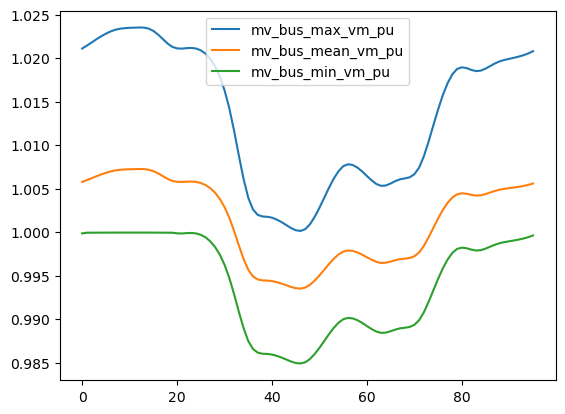

In [24]:
df_mv = pd.read_excel("./res_bus/vm_pu.xlsx", usecols='AJ,AK,AL')
df_mv.plot()
plt.show()

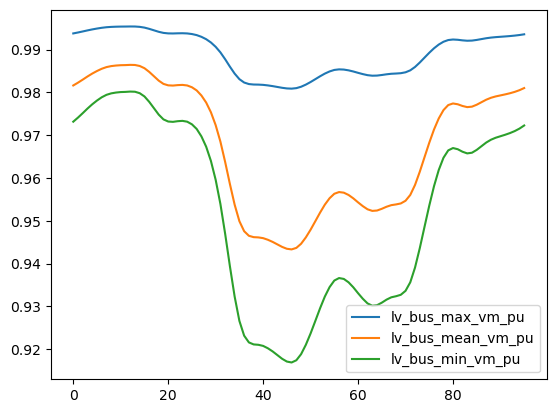

In [25]:
df_lv = pd.read_excel("./res_bus/vm_pu.xlsx", usecols='AM,AN,AO')
df_lv.plot()
plt.show()

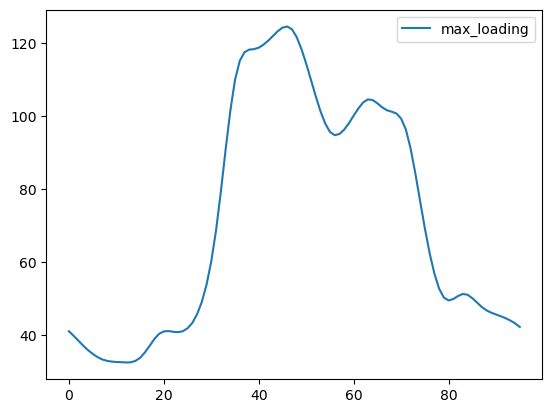

In [26]:
# 4.2.4

df_max = pd.read_excel("./res_line/loading_percent.xlsx", usecols='AH')
df_max.plot()
plt.show()

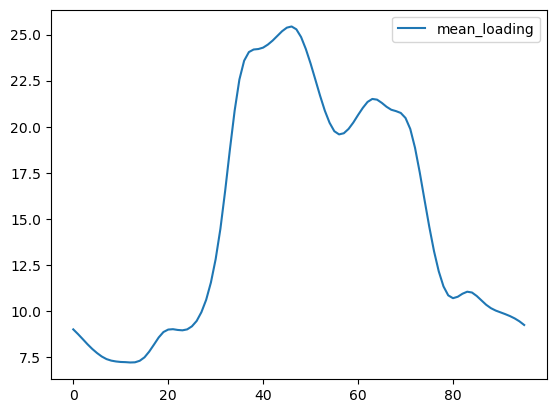

In [27]:
# 4.2.4

df_mean = pd.read_excel("./res_line/loading_percent.xlsx", usecols='AI')
df_mean.plot()
plt.show()

## G0 Sonntag

In [28]:
df_g0 = pd.read_excel("H0,G0.xlsx", usecols="J", sheet_name="G0")   #The usecols command helps to specify the column which we need for timestep values
#print(df_g0.head)

scaled_loads_pmw=[]
scaled_loads_qmvar=[]
total_loads_pmw=[]
total_loads_qmvar=[]

for idx in df_g0.index:
    for i in range(0,24):
        scaled_loads_pmw.append(net_mg.load.p_mw[i]*df_g0.at[idx,"Scaled Sonntag G0"])
        scaled_loads_qmvar.append(net_mg.load.q_mvar[i]*df_g0.at[idx,"Scaled Sonntag G0"])
    total_loads_pmw.append(scaled_loads_pmw)
    total_loads_qmvar.append(scaled_loads_qmvar)
    scaled_loads_pmw = []
    scaled_loads_qmvar=[]

df_pmw = pd.DataFrame(total_loads_pmw)
df_qmvar = pd.DataFrame(total_loads_qmvar)

ds_pmw = DFData(df_pmw)
ds_qmvar = DFData(df_qmvar)

const_load_pmw = ConstControl(net_mg, element='load', element_index=net_mg.load.index, variable='p_mw', data_source=ds_pmw, profile_name=net_mg.load.index)
const_load_qmvar = ConstControl(net_mg, element='load', element_index=net_mg.load.index, variable='q_mvar', data_source=ds_qmvar, profile_name=net_mg.load.index)

run_timeseries(net_mg)

ow = OutputWriter(net_mg, output_path="./G0_Sonntag/", output_file_type=".xlsx")

mask_mv_buses = (net_mg.bus.vn_kv > 1.0) & (net_mg.bus.vn_kv < 70.0)
mv_busses_index = net_mg.bus.loc[mask_mv_buses].index

mask_lv_buses = (net_mg.bus.vn_kv < 1.0)
lv_busses_index = net_mg.bus.loc[mask_lv_buses].index

ow.log_variable('res_bus', 'vm_pu', index=mv_busses_index, eval_function=np.max, eval_name="mv_bus_max_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=mv_busses_index, eval_function=np.mean, eval_name="mv_bus_mean_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=mv_busses_index, eval_function=np.min, eval_name="mv_bus_min_vm_pu")

ow.log_variable('res_bus', 'vm_pu', index=lv_busses_index, eval_function=np.max, eval_name="lv_bus_max_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=lv_busses_index, eval_function=np.mean, eval_name="lv_bus_mean_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=lv_busses_index, eval_function=np.min, eval_name="lv_bus_min_vm_pu")

ow.log_variable('res_line', 'loading_percent', eval_function=np.max, eval_name='max_loading')
ow.log_variable('res_line', 'loading_percent', eval_function=np.mean, eval_name='mean_loading')

run_timeseries(net_mg)

No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|██████████| 96/96 [00:01<00:00, 54.60it/s] 
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|██████████| 96/96 [00:01<00:00, 52.21it/s]


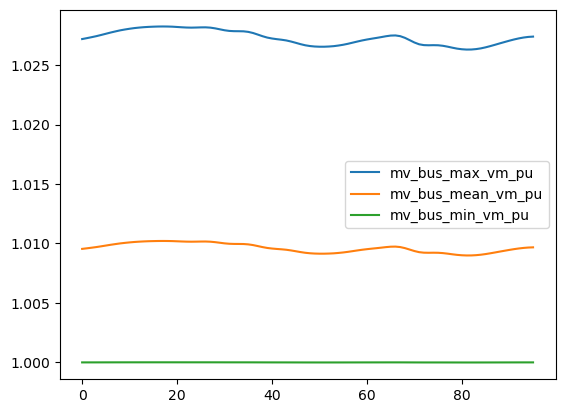

In [29]:
df_mv = pd.read_excel("./G0_Sonntag/res_bus/vm_pu.xlsx", usecols='AJ,AK,AL')
df_mv.plot()
plt.show()

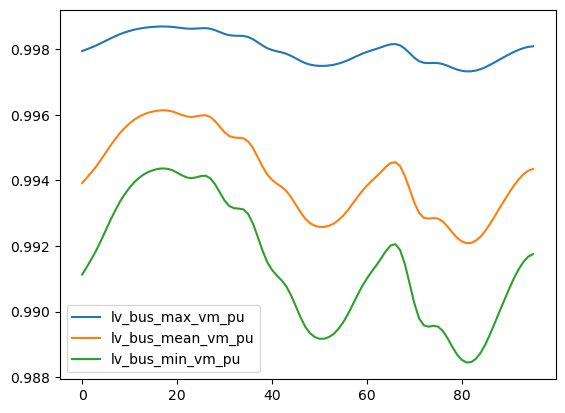

In [30]:
df_lv = pd.read_excel("./G0_Sonntag/res_bus/vm_pu.xlsx", usecols='AM,AN,AO')
df_lv.plot()
plt.show()

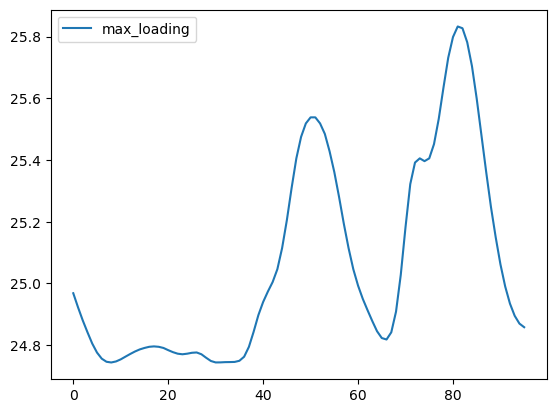

In [31]:
# 4.2.4

df_max = pd.read_excel("./G0_Sonntag/res_line/loading_percent.xlsx", usecols='AH')
df_max.plot()
plt.show()

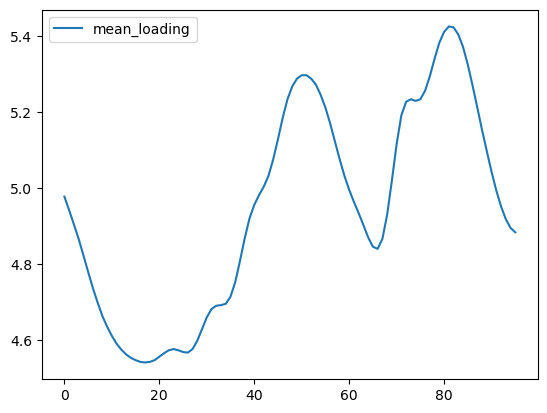

In [32]:
# 4.2.4

df_mean = pd.read_excel("./G0_Sonntag/res_line/loading_percent.xlsx", usecols='AI')
df_mean.plot()
plt.show()

## G0 Samstag

In [33]:
df_g0 = pd.read_excel("H0,G0.xlsx", usecols="K", sheet_name="G0")   #The usecols command helps to specify the column which we need for timestep values
#print(df_g0.head)

scaled_loads_pmw=[]
scaled_loads_qmvar=[]
total_loads_pmw=[]
total_loads_qmvar=[]

for idx in df_g0.index:
    for i in range(0,24):
        scaled_loads_pmw.append(net_mg.load.p_mw[i]*df_g0.at[idx,"Scaled Samstag G0"])
        scaled_loads_qmvar.append(net_mg.load.q_mvar[i]*df_g0.at[idx,"Scaled Samstag G0"])
    total_loads_pmw.append(scaled_loads_pmw)
    total_loads_qmvar.append(scaled_loads_qmvar)
    scaled_loads_pmw = []
    scaled_loads_qmvar=[]

df_pmw = pd.DataFrame(total_loads_pmw)
df_qmvar = pd.DataFrame(total_loads_qmvar)

ds_pmw = DFData(df_pmw)
ds_qmvar = DFData(df_qmvar)

const_load_pmw = ConstControl(net_mg, element='load', element_index=net_mg.load.index, variable='p_mw', data_source=ds_pmw, profile_name=net_mg.load.index)
const_load_qmvar = ConstControl(net_mg, element='load', element_index=net_mg.load.index, variable='q_mvar', data_source=ds_qmvar, profile_name=net_mg.load.index)

run_timeseries(net_mg)

ow = OutputWriter(net_mg, output_path="./G0_Samstag/", output_file_type=".xlsx")

mask_mv_buses = (net_mg.bus.vn_kv > 1.0) & (net_mg.bus.vn_kv < 70.0)
mv_busses_index = net_mg.bus.loc[mask_mv_buses].index

mask_lv_buses = (net_mg.bus.vn_kv < 1.0)
lv_busses_index = net_mg.bus.loc[mask_lv_buses].index

ow.log_variable('res_bus', 'vm_pu', index=mv_busses_index, eval_function=np.max, eval_name="mv_bus_max_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=mv_busses_index, eval_function=np.mean, eval_name="mv_bus_mean_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=mv_busses_index, eval_function=np.min, eval_name="mv_bus_min_vm_pu")

ow.log_variable('res_bus', 'vm_pu', index=lv_busses_index, eval_function=np.max, eval_name="lv_bus_max_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=lv_busses_index, eval_function=np.mean, eval_name="lv_bus_mean_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=lv_busses_index, eval_function=np.min, eval_name="lv_bus_min_vm_pu")

ow.log_variable('res_line', 'loading_percent', eval_function=np.max, eval_name='max_loading')
ow.log_variable('res_line', 'loading_percent', eval_function=np.mean, eval_name='mean_loading')

run_timeseries(net_mg)

No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|██████████| 96/96 [00:02<00:00, 47.49it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|██████████| 96/96 [00:01<00:00, 49.10it/s]


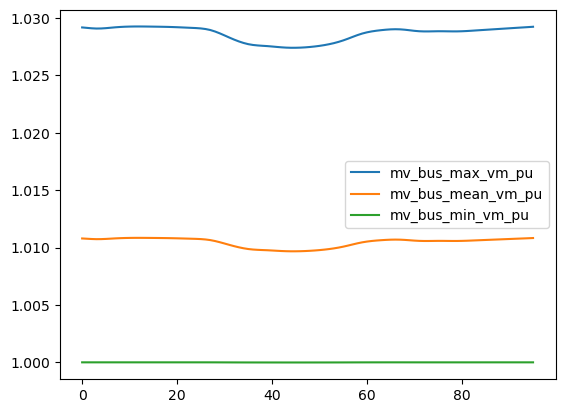

In [34]:
df_mv = pd.read_excel("./G0_Samstag/res_bus/vm_pu.xlsx", usecols='AJ,AK,AL')
df_mv.plot()
plt.show()

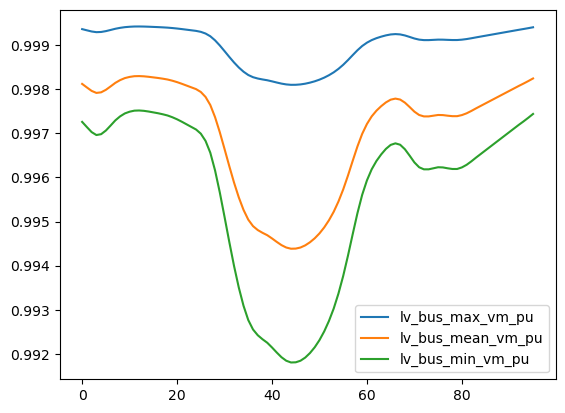

In [35]:
df_lv = pd.read_excel("./G0_Samstag/res_bus/vm_pu.xlsx", usecols='AM,AN,AO')
df_lv.plot()
plt.show()

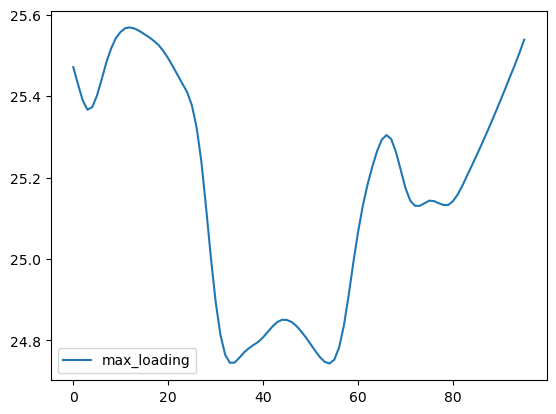

In [36]:
# 4.2.4

df_max = pd.read_excel("./G0_Samstag/res_line/loading_percent.xlsx", usecols='AH')
df_max.plot()
plt.show()

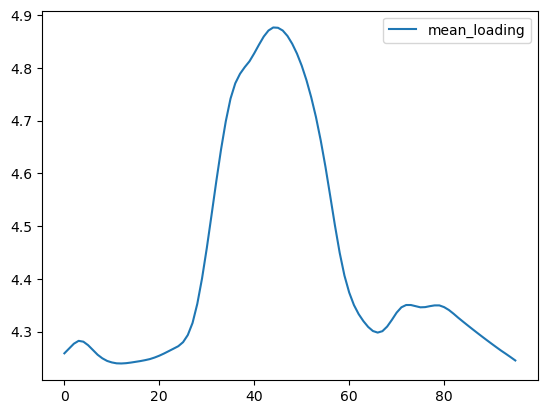

In [37]:
# 4.2.4

df_mean = pd.read_excel("./G0_Samstag/res_line/loading_percent.xlsx", usecols='AI')
df_mean.plot()
plt.show()

## HO - Werktag

In [38]:
df_h0 = pd.read_excel("H0,G0.xlsx", usecols="I", sheet_name="H0")   #The usecols command helps to specify the column which we need for timestep values

scaled_loads_pmw=[]
scaled_loads_qmvar=[]
total_loads_pmw=[]
total_loads_qmvar=[]

for idx in df_h0.index:
    for i in range(0,24):
        scaled_loads_pmw.append(net_mg.load.p_mw[i]*df_h0.at[idx,"Scaled Werktag H0"])
        scaled_loads_qmvar.append(net_mg.load.q_mvar[i]*df_h0.at[idx,"Scaled Werktag H0"])
    total_loads_pmw.append(scaled_loads_pmw)
    total_loads_qmvar.append(scaled_loads_qmvar)
    scaled_loads_pmw = []
    scaled_loads_qmvar=[]

df_pmw = pd.DataFrame(total_loads_pmw)
df_qmvar = pd.DataFrame(total_loads_qmvar)

ds_pmw = DFData(df_pmw)
ds_qmvar = DFData(df_qmvar)

const_load_pmw = ConstControl(net_mg, element='load', element_index=net_mg.load.index, variable='p_mw', data_source=ds_pmw, profile_name=net_mg.load.index)
const_load_qmvar = ConstControl(net_mg, element='load', element_index=net_mg.load.index, variable='q_mvar', data_source=ds_qmvar, profile_name=net_mg.load.index)

ow = OutputWriter(net_mg, output_path="./H0_Werktag/", output_file_type=".xlsx")

mask_mv_buses = (net_mg.bus.vn_kv > 1.0) & (net_mg.bus.vn_kv < 70.0)
mv_busses_index = net_mg.bus.loc[mask_mv_buses].index

mask_lv_buses = (net_mg.bus.vn_kv < 1.0)
lv_busses_index = net_mg.bus.loc[mask_lv_buses].index

ow.log_variable('res_bus', 'vm_pu', index=mv_busses_index, eval_function=np.max, eval_name="mv_bus_max_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=mv_busses_index, eval_function=np.mean, eval_name="mv_bus_mean_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=mv_busses_index, eval_function=np.min, eval_name="mv_bus_min_vm_pu")

ow.log_variable('res_bus', 'vm_pu', index=lv_busses_index, eval_function=np.max, eval_name="lv_bus_max_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=lv_busses_index, eval_function=np.mean, eval_name="lv_bus_mean_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=lv_busses_index, eval_function=np.min, eval_name="lv_bus_min_vm_pu")

ow.log_variable('res_line', 'loading_percent', eval_function=np.max, eval_name='max_loading')
ow.log_variable('res_line', 'loading_percent', eval_function=np.mean, eval_name='mean_loading')

run_timeseries(net_mg)

No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|██████████| 96/96 [00:01<00:00, 50.05it/s]


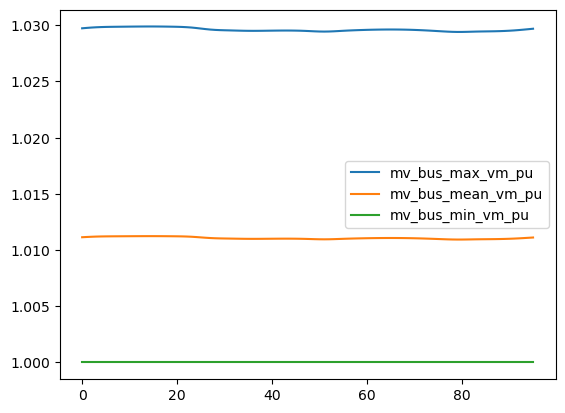

In [39]:
df_mv = pd.read_excel("./H0_Werktag/res_bus/vm_pu.xlsx", usecols='AJ,AK,AL')
df_mv.plot()
plt.show()

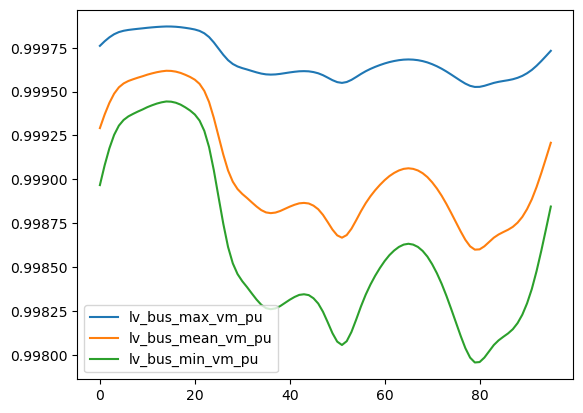

In [40]:
df_lv = pd.read_excel("./H0_Werktag/res_bus/vm_pu.xlsx", usecols='AM,AN,AO')
df_lv.plot()
plt.show()

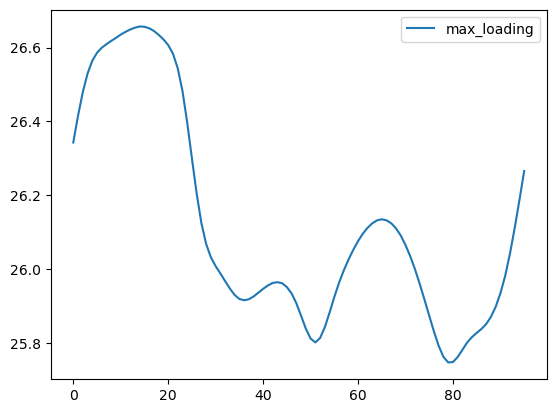

In [41]:
df_max = pd.read_excel("./H0_Werktag/res_line/loading_percent.xlsx", usecols='AH')
df_max.plot()
plt.show()

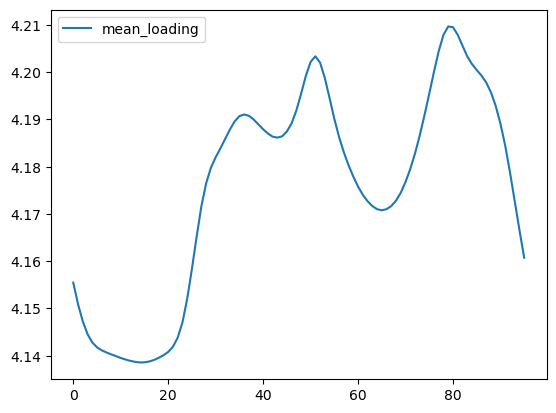

In [42]:
df_mean = pd.read_excel("./H0_Werktag/res_line/loading_percent.xlsx", usecols='AI')
df_mean.plot()
plt.show()

## H0 - Sonntg

In [43]:
df_h0 = pd.read_excel("H0,G0.xlsx", usecols="J", sheet_name="H0")   #The usecols command helps to specify the column which we need for timestep values

scaled_loads_pmw=[]
scaled_loads_qmvar=[]
total_loads_pmw=[]
total_loads_qmvar=[]

for idx in df_h0.index:
    for i in range(0,24):
        scaled_loads_pmw.append(net_mg.load.p_mw[i]*df_h0.at[idx,"Scaled Sonntag H0"])
        scaled_loads_qmvar.append(net_mg.load.q_mvar[i]*df_h0.at[idx,"Scaled Sonntag H0"])
    total_loads_pmw.append(scaled_loads_pmw)
    total_loads_qmvar.append(scaled_loads_qmvar)
    scaled_loads_pmw = []
    scaled_loads_qmvar=[]

df_pmw = pd.DataFrame(total_loads_pmw)
df_qmvar = pd.DataFrame(total_loads_qmvar)

ds_pmw = DFData(df_pmw)
ds_qmvar = DFData(df_qmvar)

const_load_pmw = ConstControl(net_mg, element='load', element_index=net_mg.load.index, variable='p_mw', data_source=ds_pmw, profile_name=net_mg.load.index)
const_load_qmvar = ConstControl(net_mg, element='load', element_index=net_mg.load.index, variable='q_mvar', data_source=ds_qmvar, profile_name=net_mg.load.index)

ow = OutputWriter(net_mg, output_path="./H0_Sonntag/", output_file_type=".xlsx")

mask_mv_buses = (net_mg.bus.vn_kv > 1.0) & (net_mg.bus.vn_kv < 70.0)
mv_busses_index = net_mg.bus.loc[mask_mv_buses].index

mask_lv_buses = (net_mg.bus.vn_kv < 1.0)
lv_busses_index = net_mg.bus.loc[mask_lv_buses].index

ow.log_variable('res_bus', 'vm_pu', index=mv_busses_index, eval_function=np.max, eval_name="mv_bus_max_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=mv_busses_index, eval_function=np.mean, eval_name="mv_bus_mean_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=mv_busses_index, eval_function=np.min, eval_name="mv_bus_min_vm_pu")

ow.log_variable('res_bus', 'vm_pu', index=lv_busses_index, eval_function=np.max, eval_name="lv_bus_max_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=lv_busses_index, eval_function=np.mean, eval_name="lv_bus_mean_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=lv_busses_index, eval_function=np.min, eval_name="lv_bus_min_vm_pu")

ow.log_variable('res_line', 'loading_percent', eval_function=np.max, eval_name='max_loading')
ow.log_variable('res_line', 'loading_percent', eval_function=np.mean, eval_name='mean_loading')

run_timeseries(net_mg)

No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|██████████| 96/96 [00:02<00:00, 46.67it/s]


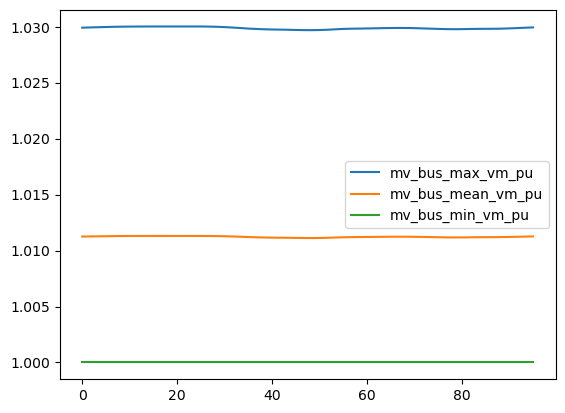

In [44]:
df_mv = pd.read_excel("./H0_Sonntag/res_bus/vm_pu.xlsx", usecols='AJ,AK,AL')
df_mv.plot()
plt.show()

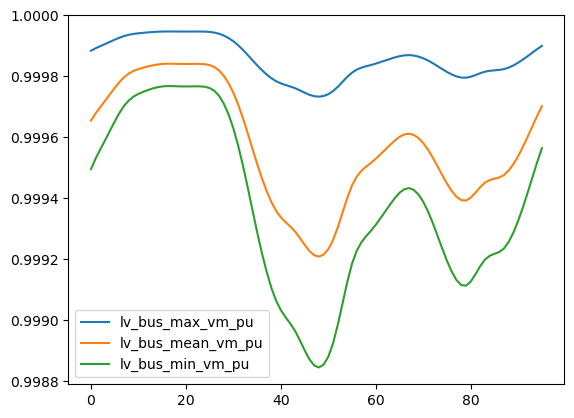

In [45]:
df_lv = pd.read_excel("./H0_Sonntag/res_bus/vm_pu.xlsx", usecols='AM,AN,AO')
df_lv.plot()
plt.show()

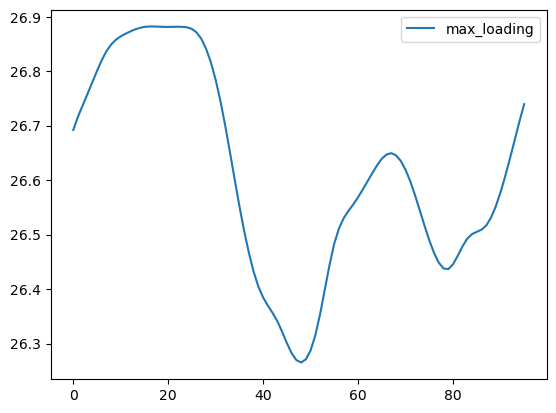

In [46]:
df_max = pd.read_excel("./H0_Sonntag/res_line/loading_percent.xlsx", usecols='AH')
df_max.plot()
plt.show()

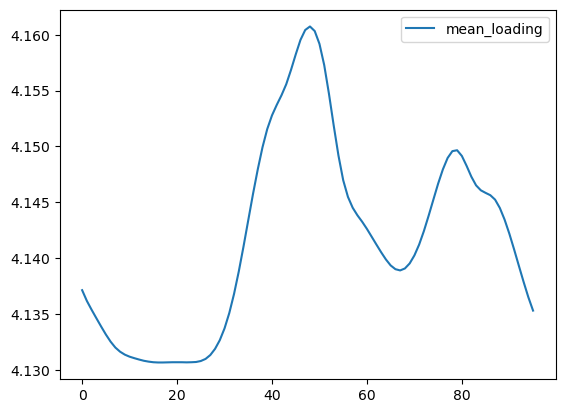

In [47]:
df_mean = pd.read_excel("./H0_Sonntag/res_line/loading_percent.xlsx", usecols='AI')
df_mean.plot()
plt.show()

## H0 - Samstag

In [48]:
df_h0 = pd.read_excel("H0,G0.xlsx", usecols="K", sheet_name="H0")   #The usecols command helps to specify the column which we need for timestep values

scaled_loads_pmw=[]
scaled_loads_qmvar=[]
total_loads_pmw=[]
total_loads_qmvar=[]

for idx in df_h0.index:
    for i in range(0,24):
        scaled_loads_pmw.append(net_mg.load.p_mw[i]*df_h0.at[idx,"Scaled Samstag H0"])
        scaled_loads_qmvar.append(net_mg.load.q_mvar[i]*df_h0.at[idx,"Scaled Samstag H0"])
    total_loads_pmw.append(scaled_loads_pmw)
    total_loads_qmvar.append(scaled_loads_qmvar)
    scaled_loads_pmw = []
    scaled_loads_qmvar=[]

df_pmw = pd.DataFrame(total_loads_pmw)
df_qmvar = pd.DataFrame(total_loads_qmvar)

ds_pmw = DFData(df_pmw)
ds_qmvar = DFData(df_qmvar)

const_load_pmw = ConstControl(net_mg, element='load', element_index=net_mg.load.index, variable='p_mw', data_source=ds_pmw, profile_name=net_mg.load.index)
const_load_qmvar = ConstControl(net_mg, element='load', element_index=net_mg.load.index, variable='q_mvar', data_source=ds_qmvar, profile_name=net_mg.load.index)

ow = OutputWriter(net_mg, output_path="./H0_Samstag/", output_file_type=".xlsx")

mask_mv_buses = (net_mg.bus.vn_kv > 1.0) & (net_mg.bus.vn_kv < 70.0)
mv_busses_index = net_mg.bus.loc[mask_mv_buses].index

mask_lv_buses = (net_mg.bus.vn_kv < 1.0)
lv_busses_index = net_mg.bus.loc[mask_lv_buses].index

ow.log_variable('res_bus', 'vm_pu', index=mv_busses_index, eval_function=np.max, eval_name="mv_bus_max_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=mv_busses_index, eval_function=np.mean, eval_name="mv_bus_mean_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=mv_busses_index, eval_function=np.min, eval_name="mv_bus_min_vm_pu")

ow.log_variable('res_bus', 'vm_pu', index=lv_busses_index, eval_function=np.max, eval_name="lv_bus_max_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=lv_busses_index, eval_function=np.mean, eval_name="lv_bus_mean_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=lv_busses_index, eval_function=np.min, eval_name="lv_bus_min_vm_pu")

ow.log_variable('res_line', 'loading_percent', eval_function=np.max, eval_name='max_loading')
ow.log_variable('res_line', 'loading_percent', eval_function=np.mean, eval_name='mean_loading')

run_timeseries(net_mg)

No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|██████████| 96/96 [00:02<00:00, 44.78it/s]


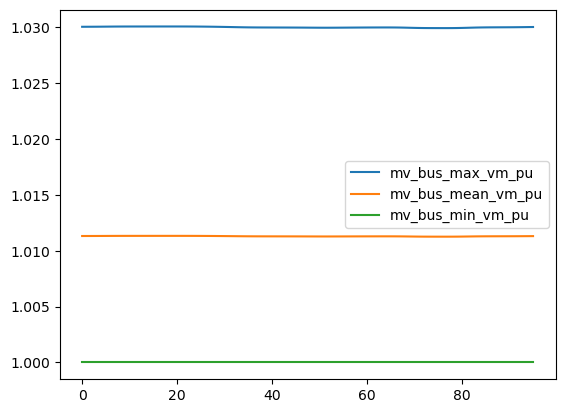

In [49]:
df_mv = pd.read_excel("./H0_Samstag/res_bus/vm_pu.xlsx", usecols='AJ,AK,AL')
df_mv.plot()
plt.show()

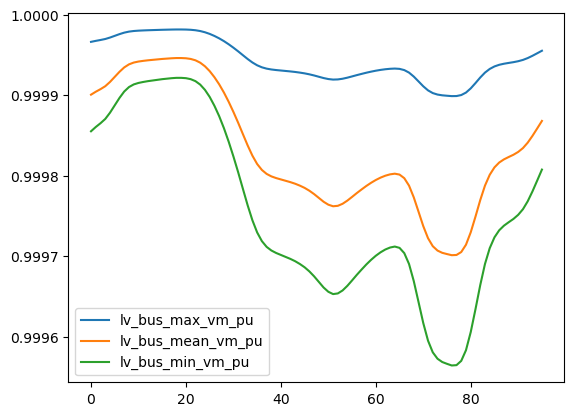

In [50]:
df_lv = pd.read_excel("./H0_Samstag/res_bus/vm_pu.xlsx", usecols='AM,AN,AO')
df_lv.plot()
plt.show()

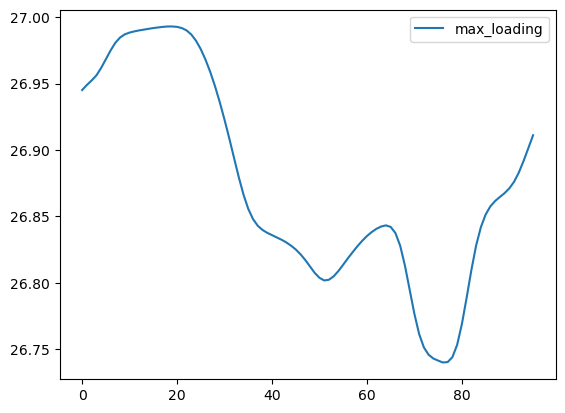

In [51]:
df_max = pd.read_excel("./H0_Samstag/res_line/loading_percent.xlsx", usecols='AH')
df_max.plot()
plt.show()

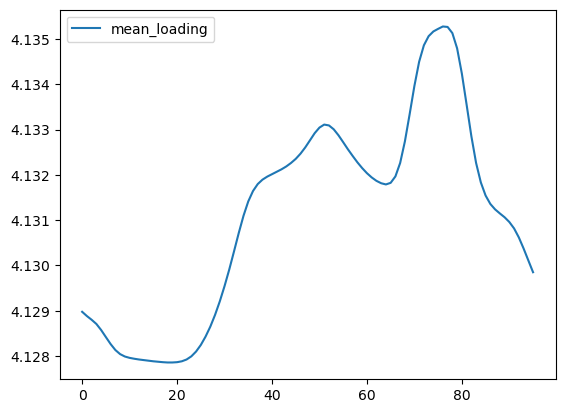

In [52]:
df_mean = pd.read_excel("./H0_Samstag/res_line/loading_percent.xlsx", usecols='AI')
df_mean.plot()
plt.show()

## Constant Controllers for PV and Wind

In [53]:
# Restoring PV and Wind values from excel files

df = pd.read_excel("MV_DER.xlsx", index_col=0, sheet_name="Merge")

for idx in df.index:
    #pp.create_sgen(net_mv, bus=df.at[idx, "bus"], p_mw=df.at[idx,"p_mw"], q_mvar=df.at[idx, "q_mvar"], sn_mva=df.at[idx,"sn_mva"], name=df.at[idx,"name"], type=df.at[idx,"type"])
    net_mg.sgen.loc[idx, "p_mw"]= df.at[idx,"p_mw"]
print(net_mg.sgen)

      name  bus   p_mw  q_mvar  sn_mva  scaling  in_service type  \
0      PV1    1  10.00     0.0   10.00      1.0        True   PV   
1     WKA1    1  12.00     0.0   12.00      1.0        True   WP   
2      PV3    3   0.15     0.0    0.15      1.0        True   PV   
3      PV4    4   0.30     0.0    0.30      1.0        True   PV   
4      PV8    8   0.15     0.0    0.15      1.0        True   PV   
5      PV9    9   0.45     0.0    0.45      1.0        True   PV   
6     PV11   11   0.30     0.0    0.30      1.0        True   PV   
7     WKA7    7   3.00     0.0    3.00      1.0        True   WP   
8     PV12   12  15.00     0.0   15.00      1.0        True   PV   
9    WKA12   12  12.00     0.0   12.00      1.0        True   WP   
10   PV R1   17   0.10     0.0    0.10      1.0        True   PV   
11  PV R11   27   0.03     0.0    0.03      1.0        True   PV   
12  PV R15   31   0.03     0.0    0.03      1.0        True   PV   
13  PV R16   32   0.03     0.0    0.03      1.0 

For Werktag: G0 + PV + Wind

In [54]:
df_g0 = pd.read_excel("H0,G0.xlsx", usecols="I", sheet_name="G0")   #The usecols command helps to specify the column which we need for timestep values

scaled_loads_pmw=[]
scaled_loads_qmvar=[]
total_loads_pmw=[]
total_loads_qmvar=[]

for idx in df_g0.index:
    for i in range(0,24):
        scaled_loads_pmw.append(net_mg.load.p_mw[i]*df_g0.at[idx,"Scaled Werktag G0"])
        scaled_loads_qmvar.append(net_mg.load.q_mvar[i]*df_g0.at[idx,"Scaled Werktag G0"])
    total_loads_pmw.append(scaled_loads_pmw)
    total_loads_qmvar.append(scaled_loads_qmvar)
    scaled_loads_pmw = []
    scaled_loads_qmvar=[]

df_pmw = pd.DataFrame(total_loads_pmw)
df_qmvar = pd.DataFrame(total_loads_qmvar)

const_load_pmw = ConstControl(net_mg, element='load', element_index=net_mg.load.index, variable='p_mw', data_source=ds_pmw, profile_name=net_mg.load.index)
const_load_qmvar = ConstControl(net_mg, element='load', element_index=net_mg.load.index, variable='q_mvar', data_source=ds_qmvar, profile_name=net_mg.load.index)

# Creating a constt controller for PV Source
df_pv = pd.read_excel("PV.xlsx", usecols="G", sheet_name="PV-Weekday")   #The usecols command helps to specify the column which we need for timestep values
df_wind = pd.read_excel("Wind.xlsx", usecols="K", sheet_name="Wind-Weekday")
scaled_pv_pmw=[]
total_pv_pmw=[]
scaled_wind_pmw=[]
total_wind_pmw=[]

for idx in df_pv.index:
    for i in range(0,16):
        if (net_mg.sgen.type.at[i] == 'PV'):
            scaled_pv_pmw.append(net_mg.sgen.p_mw[i]*df_pv.at[idx,"Scaling"])
            #print(net_mg.sgen.p_mw.at[i])
        if (net_mg.sgen.type.at[i] == 'WP'):
            scaled_wind_pmw.append(net_mg.sgen.p_mw[i]*df_wind.at[idx,"Scaling"])
    total_pv_pmw.append(scaled_pv_pmw)
    total_wind_pmw.append(scaled_wind_pmw)
    scaled_pv_pmw=[]
    scaled_wind_pmw=[]

df_pv_pmw = pd.DataFrame(total_pv_pmw, columns=[0,2,3,4,5,6,8,10,11,12,13,14,15])
df_wind_pmw = pd.DataFrame(total_wind_pmw, columns=[1,7,9])

ds_load_pmw = DFData(df_pmw)
ds_load_qmvar = DFData(df_qmvar)
ds_pv = DFData(df_pv_pmw)
ds_wind = DFData(df_wind_pmw)

const_load_pmw = ConstControl(net_mg, element='load', element_index=net_mg.load.index, variable='p_mw', data_source=ds_load_pmw, profile_name=net_mg.load.index)
const_load_qmvar = ConstControl(net_mg, element='load', element_index=net_mg.load.index, variable='q_mvar', data_source=ds_load_qmvar, profile_name=net_mg.load.index)

const_pv_pmw = ConstControl(net_mg, element='sgen', element_index=[0,2,3,4,5,6,8,10,11,12,13,14,15], variable='p_mw', data_source=ds_pv, profile_name=[0,2,3,4,5,6,8,10,11,12,13,14,15])
const_pv_pmw = ConstControl(net_mg, element='sgen', element_index=[1,7,9], variable='p_mw', data_source=ds_wind, profile_name=[1,7,9])

#run_timeseries(net_mg)

ow = OutputWriter(net_mg, output_path="./DER_G0_Werktag/", output_file_type=".xlsx")

mask_mv_buses = (net_mg.bus.vn_kv > 1.0) & (net_mg.bus.vn_kv < 70.0)
mv_busses_index = net_mg.bus.loc[mask_mv_buses].index

mask_lv_buses = (net_mg.bus.vn_kv < 1.0)
lv_busses_index = net_mg.bus.loc[mask_lv_buses].index

ow.log_variable('res_bus', 'vm_pu', index=mv_busses_index, eval_function=np.max, eval_name="mv_bus_max_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=mv_busses_index, eval_function=np.mean, eval_name="mv_bus_mean_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=mv_busses_index, eval_function=np.min, eval_name="mv_bus_min_vm_pu")

ow.log_variable('res_bus', 'vm_pu', index=lv_busses_index, eval_function=np.max, eval_name="lv_bus_max_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=lv_busses_index, eval_function=np.mean, eval_name="lv_bus_mean_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=lv_busses_index, eval_function=np.min, eval_name="lv_bus_min_vm_pu")

ow.log_variable('res_line', 'loading_percent', eval_function=np.max, eval_name='max_loading')
ow.log_variable('res_line', 'loading_percent', eval_function=np.mean, eval_name='mean_loading')

run_timeseries(net_mg)

No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|██████████| 96/96 [00:02<00:00, 38.88it/s]


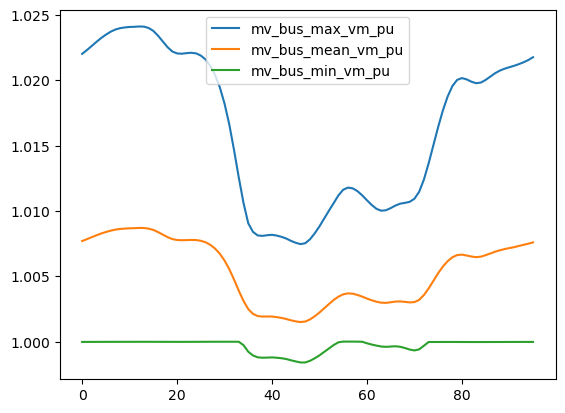

In [55]:
df_mv = pd.read_excel("./DER_G0_Werktag/res_bus/vm_pu.xlsx", usecols='AJ,AK,AL')
df_mv.plot()
plt.show()

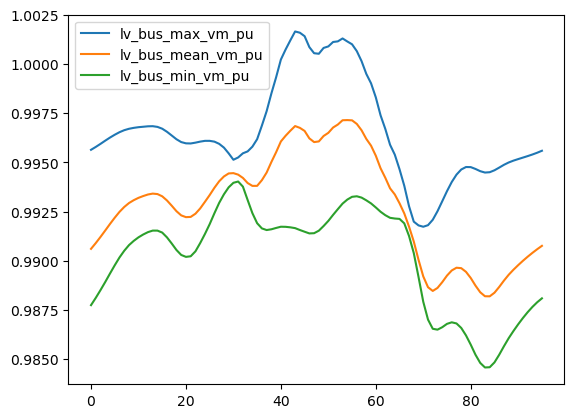

In [56]:
df_lv = pd.read_excel("./DER_G0_Werktag/res_bus/vm_pu.xlsx", usecols='AM,AN,AO')
df_lv.plot()
plt.show()

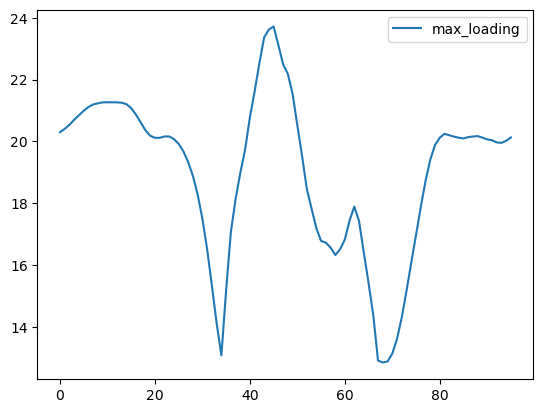

In [57]:
df_max = pd.read_excel("./DER_G0_Werktag/res_line/loading_percent.xlsx", usecols='AH')
df_max.plot()
plt.show()

For Sonntag : GO + PV + Wind 

In [58]:
df_g0 = pd.read_excel("H0,G0.xlsx", usecols="J", sheet_name="G0")   #The usecols command helps to specify the column which we need for timestep values

scaled_loads_pmw=[]
scaled_loads_qmvar=[]
total_loads_pmw=[]
total_loads_qmvar=[]

for idx in df_g0.index:
    for i in range(0,24):
        scaled_loads_pmw.append(net_mg.load.p_mw[i]*df_g0.at[idx,"Scaled Sonntag G0"])
        scaled_loads_qmvar.append(net_mg.load.q_mvar[i]*df_g0.at[idx,"Scaled Sonntag G0"])
    total_loads_pmw.append(scaled_loads_pmw)
    total_loads_qmvar.append(scaled_loads_qmvar)
    scaled_loads_pmw = []
    scaled_loads_qmvar=[]

df_pmw = pd.DataFrame(total_loads_pmw)
df_qmvar = pd.DataFrame(total_loads_qmvar)

const_load_pmw = ConstControl(net_mg, element='load', element_index=net_mg.load.index, variable='p_mw', data_source=ds_pmw, profile_name=net_mg.load.index)
const_load_qmvar = ConstControl(net_mg, element='load', element_index=net_mg.load.index, variable='q_mvar', data_source=ds_qmvar, profile_name=net_mg.load.index)

# Creating a constt controller for PV Source
df_pv = pd.read_excel("PV.xlsx", usecols="G", sheet_name="PV-Sunday")   #The usecols command helps to specify the column which we need for timestep values
df_wind = pd.read_excel("Wind.xlsx", usecols="K", sheet_name="Wind-Sunday")
scaled_pv_pmw=[]
total_pv_pmw=[]
scaled_wind_pmw=[]
total_wind_pmw=[]

for idx in df_pv.index:
    for i in range(0,16):
        if (net_mg.sgen.type.at[i] == 'PV'):
            scaled_pv_pmw.append(net_mg.sgen.p_mw[i]*df_pv.at[idx,"Scaling"])
            #print(net_mg.sgen.p_mw.at[i])
        if (net_mg.sgen.type.at[i] == 'WP'):
            scaled_wind_pmw.append(net_mg.sgen.p_mw[i]*df_wind.at[idx,"Scaling"])
    total_pv_pmw.append(scaled_pv_pmw)
    total_wind_pmw.append(scaled_wind_pmw)
    scaled_pv_pmw=[]
    scaled_wind_pmw=[]

df_pv_pmw = pd.DataFrame(total_pv_pmw, columns=[0,2,3,4,5,6,8,10,11,12,13,14,15])
df_wind_pmw = pd.DataFrame(total_wind_pmw, columns=[1,7,9])

ds_load_pmw = DFData(df_pmw)
ds_load_qmvar = DFData(df_qmvar)
ds_pv = DFData(df_pv_pmw)
ds_wind = DFData(df_wind_pmw)

const_load_pmw = ConstControl(net_mg, element='load', element_index=net_mg.load.index, variable='p_mw', data_source=ds_load_pmw, profile_name=net_mg.load.index)
const_load_qmvar = ConstControl(net_mg, element='load', element_index=net_mg.load.index, variable='q_mvar', data_source=ds_load_qmvar, profile_name=net_mg.load.index)

const_pv_pmw = ConstControl(net_mg, element='sgen', element_index=[0,2,3,4,5,6,8,10,11,12,13,14,15], variable='p_mw', data_source=ds_pv, profile_name=[0,2,3,4,5,6,8,10,11,12,13,14,15])
const_pv_pmw = ConstControl(net_mg, element='sgen', element_index=[1,7,9], variable='p_mw', data_source=ds_wind, profile_name=[1,7,9])

#run_timeseries(net_mg)

ow = OutputWriter(net_mg, output_path="./DER_G0_Sonntag/", output_file_type=".xlsx")

mask_mv_buses = (net_mg.bus.vn_kv > 1.0) & (net_mg.bus.vn_kv < 70.0)
mv_busses_index = net_mg.bus.loc[mask_mv_buses].index

mask_lv_buses = (net_mg.bus.vn_kv < 1.0)
lv_busses_index = net_mg.bus.loc[mask_lv_buses].index

ow.log_variable('res_bus', 'vm_pu', index=mv_busses_index, eval_function=np.max, eval_name="mv_bus_max_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=mv_busses_index, eval_function=np.mean, eval_name="mv_bus_mean_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=mv_busses_index, eval_function=np.min, eval_name="mv_bus_min_vm_pu")

ow.log_variable('res_bus', 'vm_pu', index=lv_busses_index, eval_function=np.max, eval_name="lv_bus_max_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=lv_busses_index, eval_function=np.mean, eval_name="lv_bus_mean_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=lv_busses_index, eval_function=np.min, eval_name="lv_bus_min_vm_pu")

ow.log_variable('res_line', 'loading_percent', eval_function=np.max, eval_name='max_loading')
ow.log_variable('res_line', 'loading_percent', eval_function=np.mean, eval_name='mean_loading')

run_timeseries(net_mg)

No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|██████████| 96/96 [00:02<00:00, 42.28it/s]


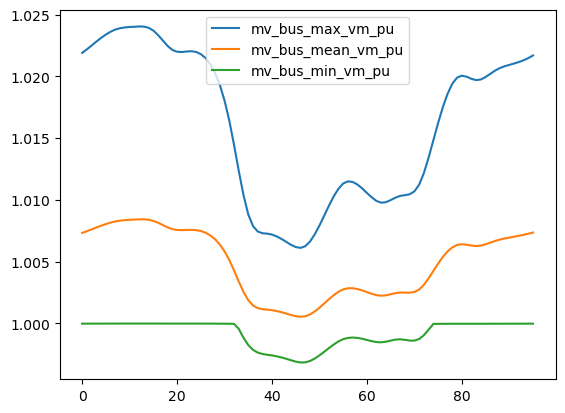

In [59]:
df_mv = pd.read_excel("./DER_G0_Sonntag/res_bus/vm_pu.xlsx", usecols='AJ,AK,AL')
df_mv.plot()
plt.show()

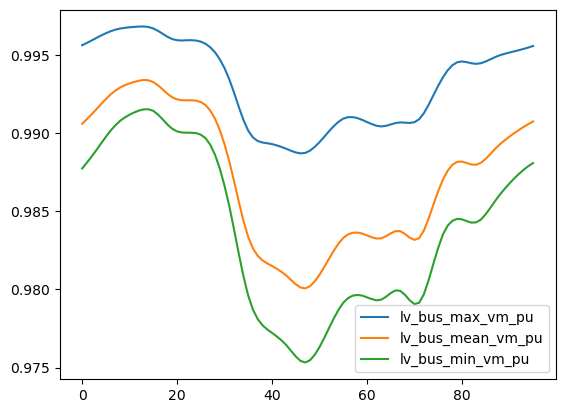

In [60]:
df_lv = pd.read_excel("./DER_G0_Sonntag/res_bus/vm_pu.xlsx", usecols='AM,AN,AO')
df_lv.plot()
plt.show()

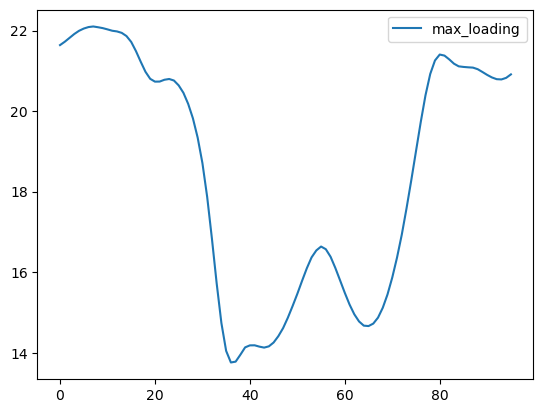

In [61]:
df_max = pd.read_excel("./DER_G0_Sonntag/res_line/loading_percent.xlsx", usecols='AH')
df_max.plot()
plt.show()

For Samstag : GO + PV + Wind

In [62]:
df_g0 = pd.read_excel("H0,G0.xlsx", usecols="K", sheet_name="G0")   #The usecols command helps to specify the column which we need for timestep values

scaled_loads_pmw=[]
scaled_loads_qmvar=[]
total_loads_pmw=[]
total_loads_qmvar=[]

for idx in df_g0.index:
    for i in range(0,24):
        scaled_loads_pmw.append(net_mg.load.p_mw[i]*df_g0.at[idx,"Scaled Samstag G0"])
        scaled_loads_qmvar.append(net_mg.load.q_mvar[i]*df_g0.at[idx,"Scaled Samstag G0"])
    total_loads_pmw.append(scaled_loads_pmw)
    total_loads_qmvar.append(scaled_loads_qmvar)
    scaled_loads_pmw = []
    scaled_loads_qmvar=[]

df_pmw = pd.DataFrame(total_loads_pmw)
df_qmvar = pd.DataFrame(total_loads_qmvar)

const_load_pmw = ConstControl(net_mg, element='load', element_index=net_mg.load.index, variable='p_mw', data_source=ds_pmw, profile_name=net_mg.load.index)
const_load_qmvar = ConstControl(net_mg, element='load', element_index=net_mg.load.index, variable='q_mvar', data_source=ds_qmvar, profile_name=net_mg.load.index)

# Creating a constt controller for PV Source
df_pv = pd.read_excel("PV.xlsx", usecols="G", sheet_name="PV-Saturday")   #The usecols command helps to specify the column which we need for timestep values
df_wind = pd.read_excel("Wind.xlsx", usecols="K", sheet_name="Wind-Saturday")
scaled_pv_pmw=[]
total_pv_pmw=[]
scaled_wind_pmw=[]
total_wind_pmw=[]

for idx in df_pv.index:
    for i in range(0,16):
        if (net_mg.sgen.type.at[i] == 'PV'):
            scaled_pv_pmw.append(net_mg.sgen.p_mw[i]*df_pv.at[idx,"Scaling"])
            #print(net_mg.sgen.p_mw.at[i])
        if (net_mg.sgen.type.at[i] == 'WP'):
            scaled_wind_pmw.append(net_mg.sgen.p_mw[i]*df_wind.at[idx,"Scaling"])
    total_pv_pmw.append(scaled_pv_pmw)
    total_wind_pmw.append(scaled_wind_pmw)
    scaled_pv_pmw=[]
    scaled_wind_pmw=[]

df_pv_pmw = pd.DataFrame(total_pv_pmw, columns=[0,2,3,4,5,6,8,10,11,12,13,14,15])
df_wind_pmw = pd.DataFrame(total_wind_pmw, columns=[1,7,9])

ds_load_pmw = DFData(df_pmw)
ds_load_qmvar = DFData(df_qmvar)
ds_pv = DFData(df_pv_pmw)
ds_wind = DFData(df_wind_pmw)

const_load_pmw = ConstControl(net_mg, element='load', element_index=net_mg.load.index, variable='p_mw', data_source=ds_load_pmw, profile_name=net_mg.load.index)
const_load_qmvar = ConstControl(net_mg, element='load', element_index=net_mg.load.index, variable='q_mvar', data_source=ds_load_qmvar, profile_name=net_mg.load.index)

const_pv_pmw = ConstControl(net_mg, element='sgen', element_index=[0,2,3,4,5,6,8,10,11,12,13,14,15], variable='p_mw', data_source=ds_pv, profile_name=[0,2,3,4,5,6,8,10,11,12,13,14,15])
const_pv_pmw = ConstControl(net_mg, element='sgen', element_index=[1,7,9], variable='p_mw', data_source=ds_wind, profile_name=[1,7,9])

#run_timeseries(net_mg)

ow = OutputWriter(net_mg, output_path="./DER_G0_Samstag/", output_file_type=".xlsx")

mask_mv_buses = (net_mg.bus.vn_kv > 1.0) & (net_mg.bus.vn_kv < 70.0)
mv_busses_index = net_mg.bus.loc[mask_mv_buses].index

mask_lv_buses = (net_mg.bus.vn_kv < 1.0)
lv_busses_index = net_mg.bus.loc[mask_lv_buses].index

ow.log_variable('res_bus', 'vm_pu', index=mv_busses_index, eval_function=np.max, eval_name="mv_bus_max_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=mv_busses_index, eval_function=np.mean, eval_name="mv_bus_mean_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=mv_busses_index, eval_function=np.min, eval_name="mv_bus_min_vm_pu")

ow.log_variable('res_bus', 'vm_pu', index=lv_busses_index, eval_function=np.max, eval_name="lv_bus_max_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=lv_busses_index, eval_function=np.mean, eval_name="lv_bus_mean_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=lv_busses_index, eval_function=np.min, eval_name="lv_bus_min_vm_pu")

ow.log_variable('res_line', 'loading_percent', eval_function=np.max, eval_name='max_loading')
ow.log_variable('res_line', 'loading_percent', eval_function=np.mean, eval_name='mean_loading')

run_timeseries(net_mg)

No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|██████████| 96/96 [00:02<00:00, 32.86it/s]


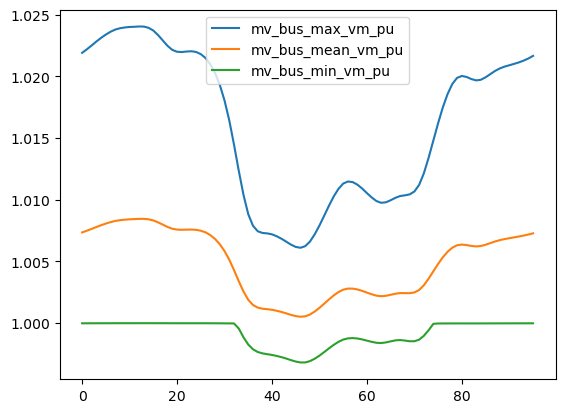

In [63]:
df_mv = pd.read_excel("./DER_G0_Samstag/res_bus/vm_pu.xlsx", usecols='AJ,AK,AL')
df_mv.plot()
plt.show()

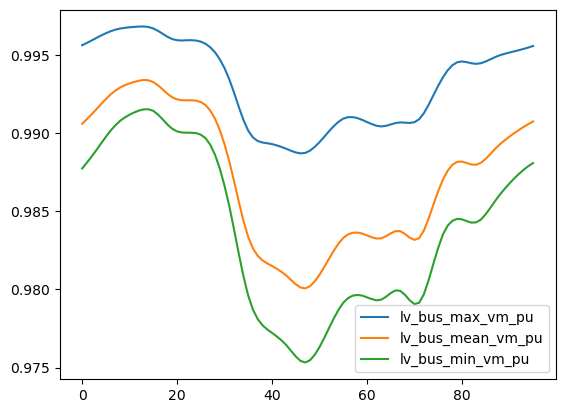

In [64]:
df_lv = pd.read_excel("./DER_G0_Samstag/res_bus/vm_pu.xlsx", usecols='AM,AN,AO')
df_lv.plot()
plt.show()

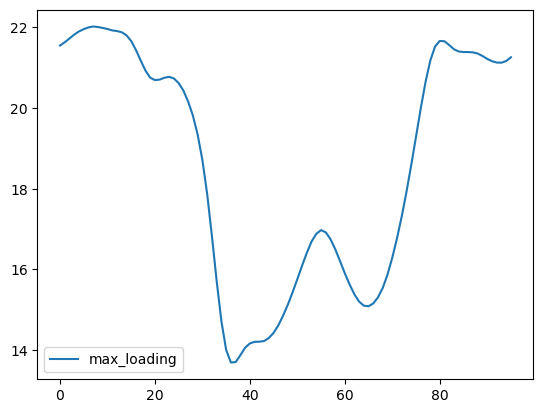

In [65]:
df_max = pd.read_excel("./DER_G0_Samstag/res_line/loading_percent.xlsx", usecols='AH')
df_max.plot()
plt.show()

For Werktag - H0 + PV + Wind

In [66]:
df_h0 = pd.read_excel("H0,G0.xlsx", usecols="I", sheet_name="H0")   #The usecols command helps to specify the column which we need for timestep values

scaled_loads_pmw=[]
scaled_loads_qmvar=[]
total_loads_pmw=[]
total_loads_qmvar=[]

for idx in df_h0.index:
    for i in range(0,24):
        scaled_loads_pmw.append(net_mg.load.p_mw[i]*df_h0.at[idx,"Scaled Werktag H0"])
        scaled_loads_qmvar.append(net_mg.load.q_mvar[i]*df_h0.at[idx,"Scaled Werktag H0"])
    total_loads_pmw.append(scaled_loads_pmw)
    total_loads_qmvar.append(scaled_loads_qmvar)
    scaled_loads_pmw = []
    scaled_loads_qmvar=[]

df_pmw = pd.DataFrame(total_loads_pmw)
df_qmvar = pd.DataFrame(total_loads_qmvar)

const_load_pmw = ConstControl(net_mg, element='load', element_index=net_mg.load.index, variable='p_mw', data_source=ds_pmw, profile_name=net_mg.load.index)
const_load_qmvar = ConstControl(net_mg, element='load', element_index=net_mg.load.index, variable='q_mvar', data_source=ds_qmvar, profile_name=net_mg.load.index)

# Creating a constt controller for PV Source
df_pv = pd.read_excel("PV.xlsx", usecols="G", sheet_name="PV-Weekday")   #The usecols command helps to specify the column which we need for timestep values
df_wind = pd.read_excel("Wind.xlsx", usecols="K", sheet_name="Wind-Weekday")
scaled_pv_pmw=[]
total_pv_pmw=[]
scaled_wind_pmw=[]
total_wind_pmw=[]

for idx in df_pv.index:
    for i in range(0,16):
        if (net_mg.sgen.type.at[i] == 'PV'):
            scaled_pv_pmw.append(net_mg.sgen.p_mw[i]*df_pv.at[idx,"Scaling"])
            #print(net_mg.sgen.p_mw.at[i])
        if (net_mg.sgen.type.at[i] == 'WP'):
            scaled_wind_pmw.append(net_mg.sgen.p_mw[i]*df_wind.at[idx,"Scaling"])
    total_pv_pmw.append(scaled_pv_pmw)
    total_wind_pmw.append(scaled_wind_pmw)
    scaled_pv_pmw=[]
    scaled_wind_pmw=[]

df_pv_pmw = pd.DataFrame(total_pv_pmw, columns=[0,2,3,4,5,6,8,10,11,12,13,14,15])
df_wind_pmw = pd.DataFrame(total_wind_pmw, columns=[1,7,9])

ds_load_pmw = DFData(df_pmw)
ds_load_qmvar = DFData(df_qmvar)
ds_pv = DFData(df_pv_pmw)
ds_wind = DFData(df_wind_pmw)

const_load_pmw = ConstControl(net_mg, element='load', element_index=net_mg.load.index, variable='p_mw', data_source=ds_load_pmw, profile_name=net_mg.load.index)
const_load_qmvar = ConstControl(net_mg, element='load', element_index=net_mg.load.index, variable='q_mvar', data_source=ds_load_qmvar, profile_name=net_mg.load.index)

const_pv_pmw = ConstControl(net_mg, element='sgen', element_index=[0,2,3,4,5,6,8,10,11,12,13,14,15], variable='p_mw', data_source=ds_pv, profile_name=[0,2,3,4,5,6,8,10,11,12,13,14,15])
const_pv_pmw = ConstControl(net_mg, element='sgen', element_index=[1,7,9], variable='p_mw', data_source=ds_wind, profile_name=[1,7,9])

#run_timeseries(net_mg)

ow = OutputWriter(net_mg, output_path="./DER_H0_Werktag/", output_file_type=".xlsx")

mask_mv_buses = (net_mg.bus.vn_kv > 1.0) & (net_mg.bus.vn_kv < 70.0)
mv_busses_index = net_mg.bus.loc[mask_mv_buses].index

mask_lv_buses = (net_mg.bus.vn_kv < 1.0)
lv_busses_index = net_mg.bus.loc[mask_lv_buses].index

ow.log_variable('res_bus', 'vm_pu', index=mv_busses_index, eval_function=np.max, eval_name="mv_bus_max_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=mv_busses_index, eval_function=np.mean, eval_name="mv_bus_mean_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=mv_busses_index, eval_function=np.min, eval_name="mv_bus_min_vm_pu")

ow.log_variable('res_bus', 'vm_pu', index=lv_busses_index, eval_function=np.max, eval_name="lv_bus_max_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=lv_busses_index, eval_function=np.mean, eval_name="lv_bus_mean_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=lv_busses_index, eval_function=np.min, eval_name="lv_bus_min_vm_pu")

ow.log_variable('res_line', 'loading_percent', eval_function=np.max, eval_name='max_loading')
ow.log_variable('res_line', 'loading_percent', eval_function=np.mean, eval_name='mean_loading')

run_timeseries(net_mg)

No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|██████████| 96/96 [00:03<00:00, 30.01it/s]


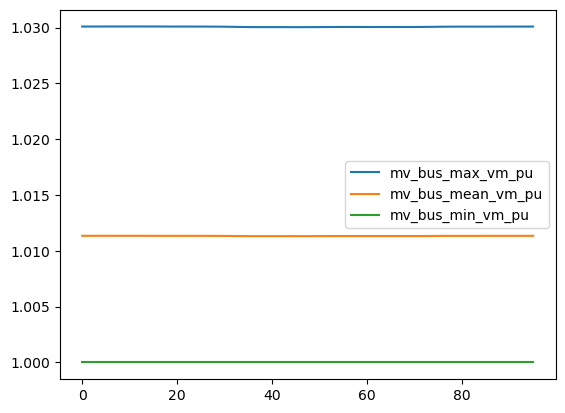

In [67]:
df_mv = pd.read_excel("./DER_H0_Werktag/res_bus/vm_pu.xlsx", usecols='AJ,AK,AL')
df_mv.plot()
plt.show()

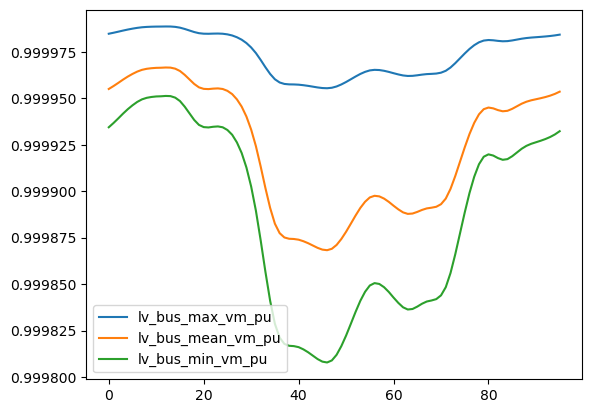

In [68]:
df_lv = pd.read_excel("./DER_H0_Werktag/res_bus/vm_pu.xlsx", usecols='AM,AN,AO')
df_lv.plot()
plt.show()

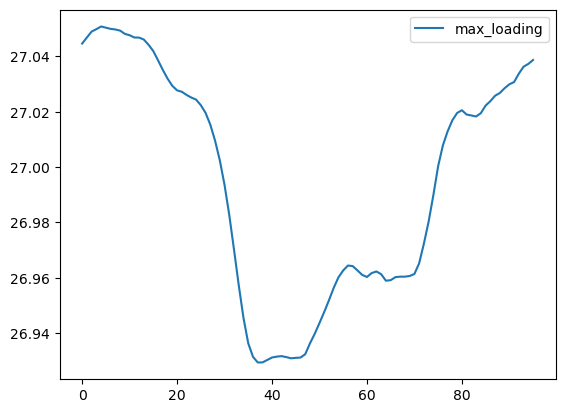

In [69]:
df_max = pd.read_excel("./DER_H0_Werktag/res_line/loading_percent.xlsx", usecols='AH')
df_max.plot()
plt.show()

For Sonntag - HO + PV + Wind

In [70]:
df_h0 = pd.read_excel("H0,G0.xlsx", usecols="J", sheet_name="H0")   #The usecols command helps to specify the column which we need for timestep values

scaled_loads_pmw=[]
scaled_loads_qmvar=[]
total_loads_pmw=[]
total_loads_qmvar=[]

for idx in df_h0.index:
    for i in range(0,24):
        scaled_loads_pmw.append(net_mg.load.p_mw[i]*df_h0.at[idx,"Scaled Sonntag H0"])
        scaled_loads_qmvar.append(net_mg.load.q_mvar[i]*df_h0.at[idx,"Scaled Sonntag H0"])
    total_loads_pmw.append(scaled_loads_pmw)
    total_loads_qmvar.append(scaled_loads_qmvar)
    scaled_loads_pmw = []
    scaled_loads_qmvar=[]

df_pmw = pd.DataFrame(total_loads_pmw)
df_qmvar = pd.DataFrame(total_loads_qmvar)

const_load_pmw = ConstControl(net_mg, element='load', element_index=net_mg.load.index, variable='p_mw', data_source=ds_pmw, profile_name=net_mg.load.index)
const_load_qmvar = ConstControl(net_mg, element='load', element_index=net_mg.load.index, variable='q_mvar', data_source=ds_qmvar, profile_name=net_mg.load.index)

# Creating a constt controller for PV Source
df_pv = pd.read_excel("PV.xlsx", usecols="G", sheet_name="PV-Sunday")   #The usecols command helps to specify the column which we need for timestep values
df_wind = pd.read_excel("Wind.xlsx", usecols="K", sheet_name="Wind-Sunday")
scaled_pv_pmw=[]
total_pv_pmw=[]
scaled_wind_pmw=[]
total_wind_pmw=[]

for idx in df_pv.index:
    for i in range(0,16):
        if (net_mg.sgen.type.at[i] == 'PV'):
            scaled_pv_pmw.append(net_mg.sgen.p_mw[i]*df_pv.at[idx,"Scaling"])
            #print(net_mg.sgen.p_mw.at[i])
        if (net_mg.sgen.type.at[i] == 'WP'):
            scaled_wind_pmw.append(net_mg.sgen.p_mw[i]*df_wind.at[idx,"Scaling"])
    total_pv_pmw.append(scaled_pv_pmw)
    total_wind_pmw.append(scaled_wind_pmw)
    scaled_pv_pmw=[]
    scaled_wind_pmw=[]

df_pv_pmw = pd.DataFrame(total_pv_pmw, columns=[0,2,3,4,5,6,8,10,11,12,13,14,15])
df_wind_pmw = pd.DataFrame(total_wind_pmw, columns=[1,7,9])

ds_load_pmw = DFData(df_pmw)
ds_load_qmvar = DFData(df_qmvar)
ds_pv = DFData(df_pv_pmw)
ds_wind = DFData(df_wind_pmw)

const_load_pmw = ConstControl(net_mg, element='load', element_index=net_mg.load.index, variable='p_mw', data_source=ds_load_pmw, profile_name=net_mg.load.index)
const_load_qmvar = ConstControl(net_mg, element='load', element_index=net_mg.load.index, variable='q_mvar', data_source=ds_load_qmvar, profile_name=net_mg.load.index)

const_pv_pmw = ConstControl(net_mg, element='sgen', element_index=[0,2,3,4,5,6,8,10,11,12,13,14,15], variable='p_mw', data_source=ds_pv, profile_name=[0,2,3,4,5,6,8,10,11,12,13,14,15])
const_pv_pmw = ConstControl(net_mg, element='sgen', element_index=[1,7,9], variable='p_mw', data_source=ds_wind, profile_name=[1,7,9])

#run_timeseries(net_mg)

ow = OutputWriter(net_mg, output_path="./DER_H0_Sonntag/", output_file_type=".xlsx")

mask_mv_buses = (net_mg.bus.vn_kv > 1.0) & (net_mg.bus.vn_kv < 70.0)
mv_busses_index = net_mg.bus.loc[mask_mv_buses].index

mask_lv_buses = (net_mg.bus.vn_kv < 1.0)
lv_busses_index = net_mg.bus.loc[mask_lv_buses].index

ow.log_variable('res_bus', 'vm_pu', index=mv_busses_index, eval_function=np.max, eval_name="mv_bus_max_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=mv_busses_index, eval_function=np.mean, eval_name="mv_bus_mean_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=mv_busses_index, eval_function=np.min, eval_name="mv_bus_min_vm_pu")

ow.log_variable('res_bus', 'vm_pu', index=lv_busses_index, eval_function=np.max, eval_name="lv_bus_max_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=lv_busses_index, eval_function=np.mean, eval_name="lv_bus_mean_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=lv_busses_index, eval_function=np.min, eval_name="lv_bus_min_vm_pu")

ow.log_variable('res_line', 'loading_percent', eval_function=np.max, eval_name='max_loading')
ow.log_variable('res_line', 'loading_percent', eval_function=np.mean, eval_name='mean_loading')

run_timeseries(net_mg)

No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|██████████| 96/96 [00:04<00:00, 23.34it/s]


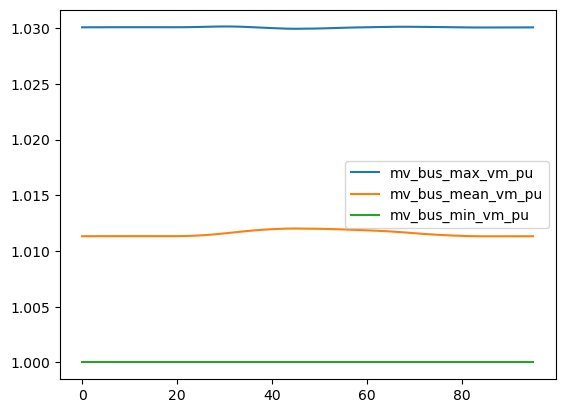

In [71]:
df_mv = pd.read_excel("./DER_H0_Sonntag/res_bus/vm_pu.xlsx", usecols='AJ,AK,AL')
df_mv.plot()
plt.show()

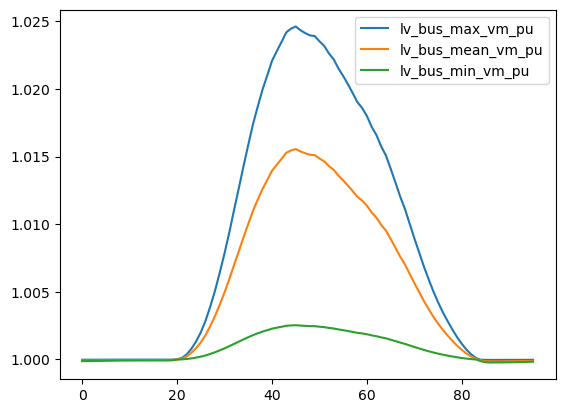

In [72]:
df_lv = pd.read_excel("./DER_H0_Sonntag/res_bus/vm_pu.xlsx", usecols='AM,AN,AO')
df_lv.plot()
plt.show()

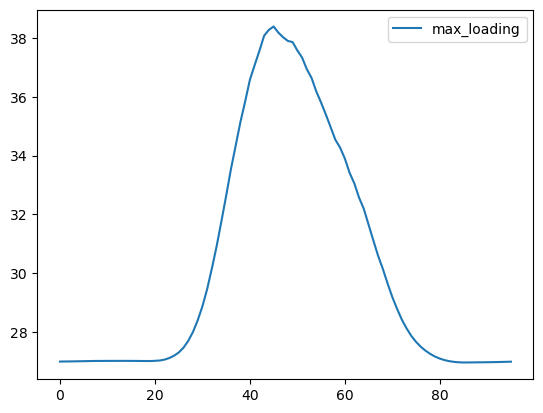

In [73]:
df_max = pd.read_excel("./DER_H0_Sonntag/res_line/loading_percent.xlsx", usecols='AH')
df_max.plot()
plt.show()

For Samstag - H0 + PV + Wind

In [74]:
df_h0 = pd.read_excel("H0,G0.xlsx", usecols="K", sheet_name="H0")   #The usecols command helps to specify the column which we need for timestep values

scaled_loads_pmw=[]
scaled_loads_qmvar=[]
total_loads_pmw=[]
total_loads_qmvar=[]

for idx in df_h0.index:
    for i in range(0,24):
        scaled_loads_pmw.append(net_mg.load.p_mw[i]*df_h0.at[idx,"Scaled Samstag H0"])
        scaled_loads_qmvar.append(net_mg.load.q_mvar[i]*df_h0.at[idx,"Scaled Samstag H0"])
    total_loads_pmw.append(scaled_loads_pmw)
    total_loads_qmvar.append(scaled_loads_qmvar)
    scaled_loads_pmw = []
    scaled_loads_qmvar=[]

df_pmw = pd.DataFrame(total_loads_pmw)
df_qmvar = pd.DataFrame(total_loads_qmvar)

const_load_pmw = ConstControl(net_mg, element='load', element_index=net_mg.load.index, variable='p_mw', data_source=ds_pmw, profile_name=net_mg.load.index)
const_load_qmvar = ConstControl(net_mg, element='load', element_index=net_mg.load.index, variable='q_mvar', data_source=ds_qmvar, profile_name=net_mg.load.index)

# Creating a constt controller for PV Source
df_pv = pd.read_excel("PV.xlsx", usecols="G", sheet_name="PV-Saturday")   #The usecols command helps to specify the column which we need for timestep values
df_wind = pd.read_excel("Wind.xlsx", usecols="K", sheet_name="Wind-Saturday")
scaled_pv_pmw=[]
total_pv_pmw=[]
scaled_wind_pmw=[]
total_wind_pmw=[]

for idx in df_pv.index:
    for i in range(0,16):
        if (net_mg.sgen.type.at[i] == 'PV'):
            scaled_pv_pmw.append(net_mg.sgen.p_mw[i]*df_pv.at[idx,"Scaling"])
            #print(net_mg.sgen.p_mw.at[i])
        if (net_mg.sgen.type.at[i] == 'WP'):
            scaled_wind_pmw.append(net_mg.sgen.p_mw[i]*df_wind.at[idx,"Scaling"])
    total_pv_pmw.append(scaled_pv_pmw)
    total_wind_pmw.append(scaled_wind_pmw)
    scaled_pv_pmw=[]
    scaled_wind_pmw=[]

df_pv_pmw = pd.DataFrame(total_pv_pmw, columns=[0,2,3,4,5,6,8,10,11,12,13,14,15])
df_wind_pmw = pd.DataFrame(total_wind_pmw, columns=[1,7,9])

ds_load_pmw = DFData(df_pmw)
ds_load_qmvar = DFData(df_qmvar)
ds_pv = DFData(df_pv_pmw)
ds_wind = DFData(df_wind_pmw)

const_load_pmw = ConstControl(net_mg, element='load', element_index=net_mg.load.index, variable='p_mw', data_source=ds_load_pmw, profile_name=net_mg.load.index)
const_load_qmvar = ConstControl(net_mg, element='load', element_index=net_mg.load.index, variable='q_mvar', data_source=ds_load_qmvar, profile_name=net_mg.load.index)

const_pv_pmw = ConstControl(net_mg, element='sgen', element_index=[0,2,3,4,5,6,8,10,11,12,13,14,15], variable='p_mw', data_source=ds_pv, profile_name=[0,2,3,4,5,6,8,10,11,12,13,14,15])
const_pv_pmw = ConstControl(net_mg, element='sgen', element_index=[1,7,9], variable='p_mw', data_source=ds_wind, profile_name=[1,7,9])

#run_timeseries(net_mg)

ow = OutputWriter(net_mg, output_path="./DER_H0_Samstag/", output_file_type=".xlsx")

mask_mv_buses = (net_mg.bus.vn_kv > 1.0) & (net_mg.bus.vn_kv < 70.0)
mv_busses_index = net_mg.bus.loc[mask_mv_buses].index

mask_lv_buses = (net_mg.bus.vn_kv < 1.0)
lv_busses_index = net_mg.bus.loc[mask_lv_buses].index

ow.log_variable('res_bus', 'vm_pu', index=mv_busses_index, eval_function=np.max, eval_name="mv_bus_max_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=mv_busses_index, eval_function=np.mean, eval_name="mv_bus_mean_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=mv_busses_index, eval_function=np.min, eval_name="mv_bus_min_vm_pu")

ow.log_variable('res_bus', 'vm_pu', index=lv_busses_index, eval_function=np.max, eval_name="lv_bus_max_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=lv_busses_index, eval_function=np.mean, eval_name="lv_bus_mean_vm_pu")
ow.log_variable('res_bus', 'vm_pu', index=lv_busses_index, eval_function=np.min, eval_name="lv_bus_min_vm_pu")

ow.log_variable('res_line', 'loading_percent', eval_function=np.max, eval_name='max_loading')
ow.log_variable('res_line', 'loading_percent', eval_function=np.mean, eval_name='mean_loading')

run_timeseries(net_mg)

No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|██████████| 96/96 [00:04<00:00, 22.62it/s]


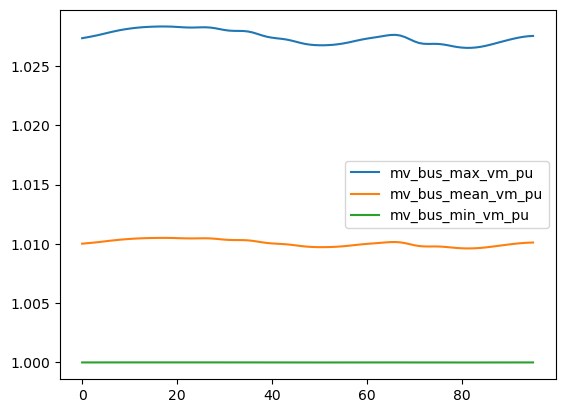

In [75]:
df_mv = pd.read_excel("./DER_H0_Samstag/res_bus/vm_pu.xlsx", usecols='AJ,AK,AL')
df_mv.plot()
plt.show()

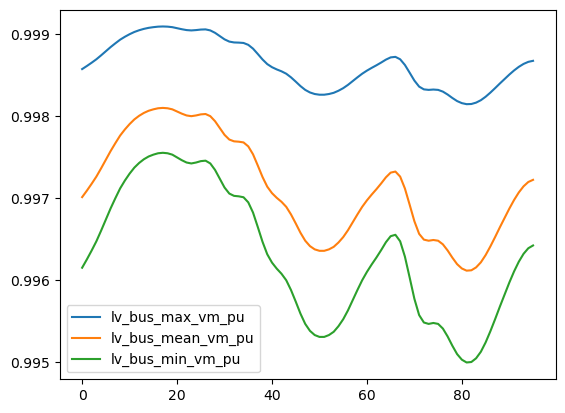

In [76]:
df_lv = pd.read_excel("./DER_H0_Samstag/res_bus/vm_pu.xlsx", usecols='AM,AN,AO')
df_lv.plot()
plt.show()

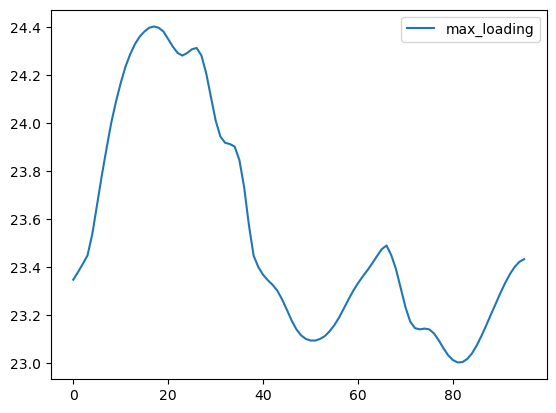

In [77]:
df_max = pd.read_excel("./DER_H0_Samstag/res_line/loading_percent.xlsx", usecols='AH')
df_max.plot()
plt.show()